## Map plotting examples

In [1]:
from PyMapManager.mmMap import mmMap

# load a map
filePath = '/Users/cudmore/Desktop/data/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.3 seconds.


mmMap.getMapValues() took 0.03 seconds
mmMap.getMapValues() took 0.01 seconds


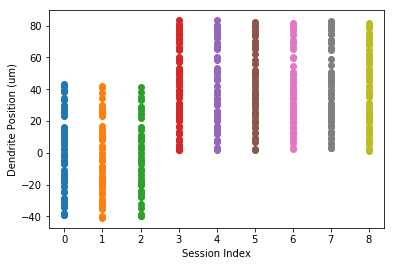

In [2]:
# getMapValues2(self, stat, roiType='spineROI', segmentID=[], plotBad=False)

segmentID = [0] # change this to '[]' to plot all segment, change to '[1,3,5]' to plot segment 1, 3, and 5

# m.getMapValues2() returns a 2D numpy ndarray
# rows are object runs, columns are sessions, each [i][j] is value for 'stat'
x = m.getMapValues2('mapSession', roiType='spineROI', segmentID=segmentID, plotBad=False)
y = m.getMapValues2('pDist', roiType='spineROI', segmentID=segmentID, plotBad=False)


import matplotlib.pyplot as plt

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('Session Index')
plt.ylabel('Dendrite Position (um)')
plt.show()

mmMap.getMapValues() took 0.01 seconds
mmMap.getMapValues() took 0.01 seconds


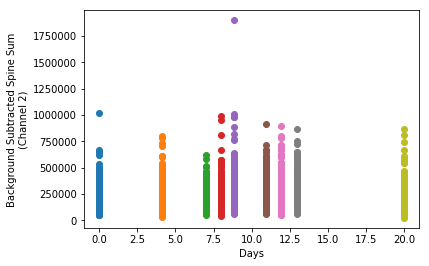

In [3]:
# slightly more interesting
# plot the 'background subtracted spine sum' from image channel two

segmentID = []
x = m.getMapValues2('days', segmentID=segmentID)
y = m.getMapValues2('ubssSum_int2', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('Days')
plt.ylabel('Background Subtracted Spine Sum\n(Channel 2)')
plt.show()

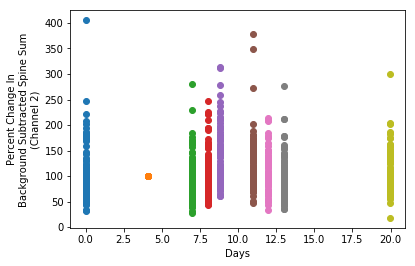

In [4]:
# replot bssSum as percent change relative to session 1

sessionOne = y[:,1]
yPercent = y / sessionOne[:,None] * 100 # [:,None] to cast sessionOne to a numpy vector

# plot with matplotlib
plt.plot(x, yPercent, 'o')
plt.xlabel('Days')
plt.ylabel('Percent Change In\nBackground Subtracted Spine Sum\n(Channel 2)')
plt.show()

In [5]:
m.runMap.shape
m.runMap.dtype

dtype('float64')

mmMap.getMapValues3() took 0.02 seconds
mmMap.getMapValues3() took 0.01 seconds
mmMap.getMapValues() took 0.01 seconds


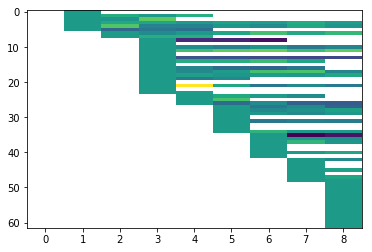

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from PyMapManager.mmUtil import PLOT_DICT

pd = dict(PLOT_DICT)
pd['xstat'] = 'mapSession'
pd['ystat'] = 'pDist'
pd['zstat'] = 'sLen3d_int1' #'ubssSum_int2'
pd['segmentid'] = [0]

pd = m.getMapValues3(pd)

"""
#only plot spines in all sessions
new_z = []
for row in pd['z']:
    if np.count_nonzero(~np.isnan(row)) == m.numSessions:
        new_z.append(row)
        
plt.imshow(new_z)
plt.show()
"""

pd2 = dict(pd)
pd2['xstat'] = 'isAdd'
pd2['ystat'] = 'isSub'
pd2['zstat'] = 'isTransient'
pd2 = m.getMapValues3(pd2)


#only plot added spines
x = m.getMapValues2('days', segmentID=pd['segmentid']) # get an array of values
new_z2 = []

for i, row in enumerate(pd['z']):
    #if np.count_nonzero(~np.isnan(row)) > 0:
    for j, val in enumerate(row):
        if pd2['x'][i,j] == 1:
            #row = row / row[j] * 100 # z-color in imshow will be '% change' from session spine was added
            row = row - row[j] # z-color in imshow will be 'absolute change' from session spine was added
            new_z2.append(row)
            break

plt.imshow(new_z2, aspect='auto')
plt.show()

### Homework
 - Plot ubssSum_int2 vs pDist, sort along pDist, calculate auto-correlation function at lag 1. Peaks in auto-correlation indicate 'hot spots' along dendritic segment. Do this for all segments in a map.
 - Plot a heat map of spine run vs session where color is ubssSum_ch2
 - plot ubssSum as a function of a spines age. X-axis should be days where day 0 is appearance of new spine. This plot will only have added spines
 - Do the same for spine 'death' where x-axis counts down to day 0 when a spine is subtracted
 

mmMap.getMapValues3() took 0.01 seconds
mmMap.getMapValues() took 0.01 seconds


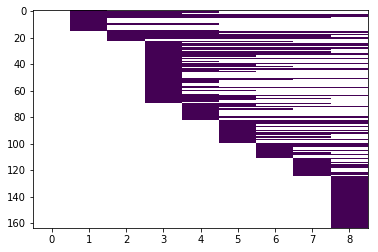

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from PyMapManager.mmUtil import PLOT_DICT

pd2 = dict(PLOT_DICT)
pd2['xstat'] = 'isAdd'
pd2['zstat'] = 'isTransient'
pd2['segmentid'] = []
pd2 = m.getMapValues3(pd2) # fetch values from the map

#only plot added spines
x = m.getMapValues2('days', segmentID=pd2['segmentid']) # get an array of values
new_z2 = []

for i, row in enumerate(pd2['z']):
    for j, val in enumerate(row):
        if pd2['x'][i,j] == 1:
            row = row - row[j] # z-color in imshow will be 'absolute change' from session spine was added
            new_z2.append(row)
            break

plt.imshow(new_z2, aspect='auto')
plt.show()